<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; min-width: 250px; display: flex; justify-content: center;">
        <img src="https://adnova.novaims.unl.pt/media/22ui3ptm/logo.svg" style="max-width: 80%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;margin-left: 8rem;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style='color:#6f800f'> Data Mining Project | </span>
            <span style='color:#393B79'>ABCDEats Inc.</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>Filipa Pereira, 20240509</div>
            <div>Umeima Mahomed, 20240543</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            Group 37
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#6f800f, #393B79); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [1]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap

# For HC + K-Means Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Set the style of the visualization
pd.set_option('display.max_columns', None)                  # display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display floats with 2 decimal places

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #6f800f,#393B79); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>Part 2 | K-Means Clustering </b></h1></center>
</div>

## **🧮 Import Data**

---

## **⚫🟢⚪ Clustering**

### **K-Means Clustering Algorithm[<sup>[2]</sup>](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)**

### **Define the number of clusters**

In [11]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(ABCDEats[metric_features])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

**Inertia Formula:**

$$\sum_{j=0}^{C}\sum_{i=0}^{n_j}(||x_i - \mu_j||^2)$$
, where:

- $C$: Set of identified clusters.
- $n_j$: Set of observations belonging to cluster $j$.
- $x_i$: Observation $i$.
- $\mu_j$: Centroid of cluster $j$.

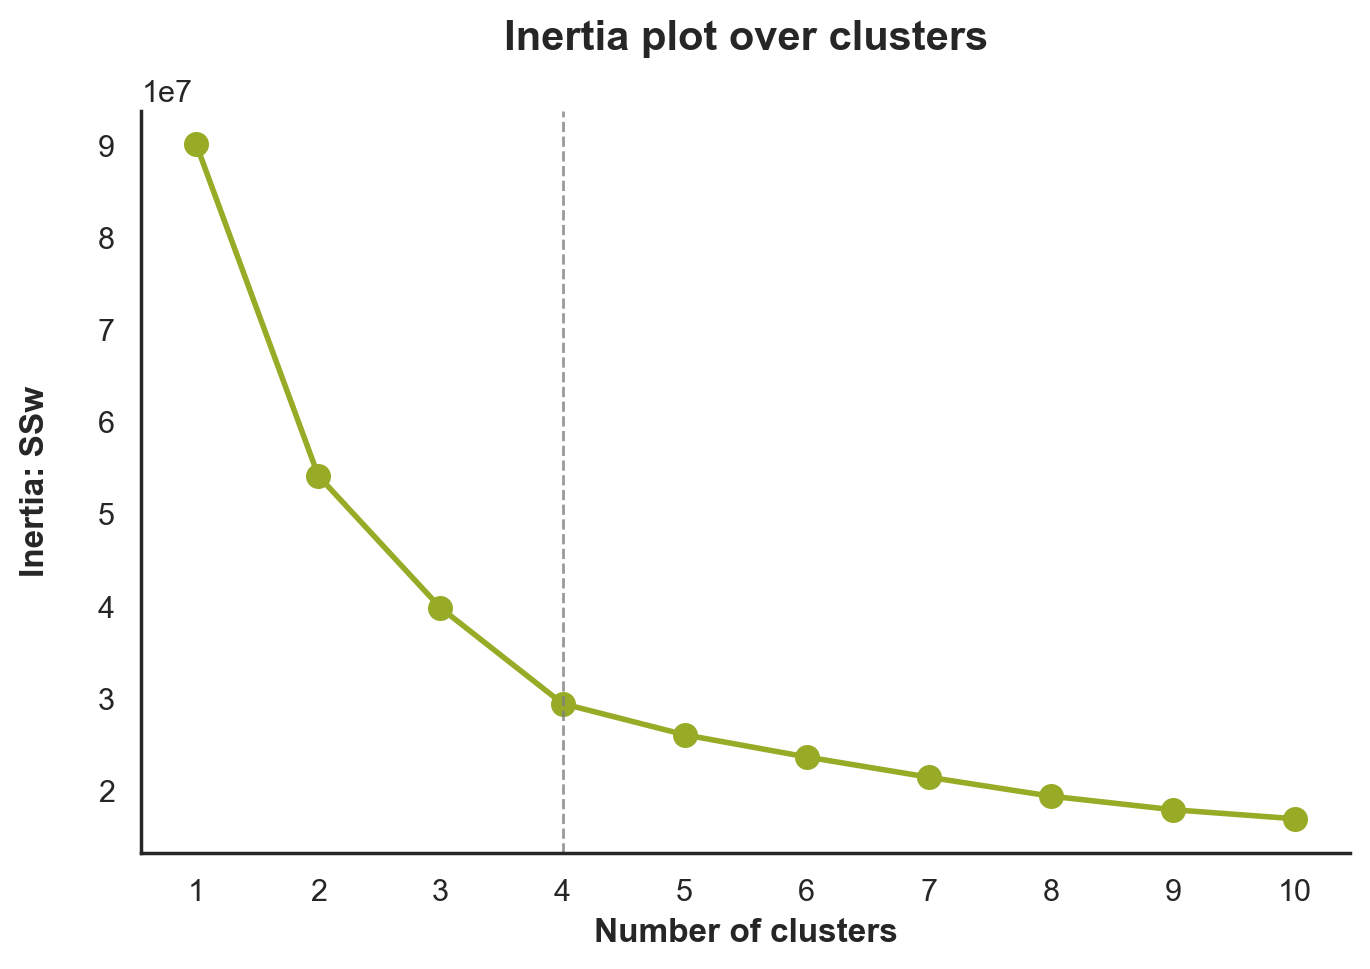

In [24]:
# Inertia Plot
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(range_clusters, inertia, marker='o', color = NOVAIMS_palette_colors[1], linewidth=2, markersize=8)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw\n", size=12, weight='bold')
ax.set_xlabel("Number of clusters", size=12, weight='bold')
ax.set_title("Inertia plot over clusters\n", size=15, weight='bold')

# Add the number of clusters chosen
ax.axvline(x=4, color='grey', linestyle='--', linewidth=1, alpha=0.8)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_Inertia_Plot.png', dpi=300, bbox_inches='tight')
plt.show()


### **Silhouette Coefficient**

**Silhouette Coefficient formula for a single sample:**
$$s = \frac{b - a}{max(a, b)}$$
, where:
- $a$: The mean distance between a sample and all other points in the same cluster.
- $b$: The mean distance between a sample and all other points in the next nearest cluster

---


If $b > a$, then what?

Then the sample is closer to the points in the cluster it is assigned to (compared to the points in the next nearest cluster)

$$s \text{ is positive }$$

<div class="alert alert-block alert-success" style="font-size:20px;">

[**If $b > a$, then what?**] -> **Good!** (Os pontos do mesmo cluster estão mais próximos do que os pontos do cluster mais próximo **OU** alto $b$ e baixo $a$ quando ele próprio é o centroid)

</div>

---


If $b = a$, then what?

*Then the sample is equally distant to the points in the cluster it is assigned to as well as the points in the next closest cluster*

$$s \text{ is 0}$$

<div class="alert alert-block alert-warning" style="font-size:20px;">

[**If $b = a$, then what?**] -> **Ok!** (Os pontos do mesmo cluster estão igualmente distantes dos pontos do cluster mais próximo **OU** $(b-a)/b=0$ podia pertencer a qualquer cluster)

</div>


---

If $b < a$, then what?

*Then the sample is closer to the points in the next closest cluster (compared to the points in the same cluster).*

$$s \text{ is negative }$$

<div class="alert alert-block alert-danger" style="font-size:20px;">

[**If $b < a$, then what?**] -> **Bad!** (Os pontos do mesmo cluster estão mais distantes do que os pontos do cluster mais próximo [OUTLIER ⚠️⚠️])

</div>

---

**If the average value of $s$ is high, then what?**


"Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster."

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


<div class="alert alert-block alert-info" style="font-size:20px;">

**Silhouette Coefficient** ranges from -1 to 1. [COPILOT]

- **1**: The sample is far away from the neighboring clusters.
- **0**: The sample is on or very close to the decision boundary between two neighboring clusters.
- **-1**: The sample might have been assigned to the wrong cluster.
- 
- **Negative values**: Incorrect clustering.
- **Values near 0**: Overlapping clusters.
- **Values near 1**: Well separated clusters.



For n_clusters = 2, the average silhouette_score is : 0.361285980516566
For n_clusters = 3, the average silhouette_score is : 0.3609690686850399
For n_clusters = 4, the average silhouette_score is : 0.36182341921789507
For n_clusters = 5, the average silhouette_score is : 0.30622401220852197
For n_clusters = 6, the average silhouette_score is : 0.29762779890103086
For n_clusters = 7, the average silhouette_score is : 0.2851086555333711
For n_clusters = 8, the average silhouette_score is : 0.2786379040603213
For n_clusters = 9, the average silhouette_score is : 0.28143106102413834
For n_clusters = 10, the average silhouette_score is : 0.2690310995650818


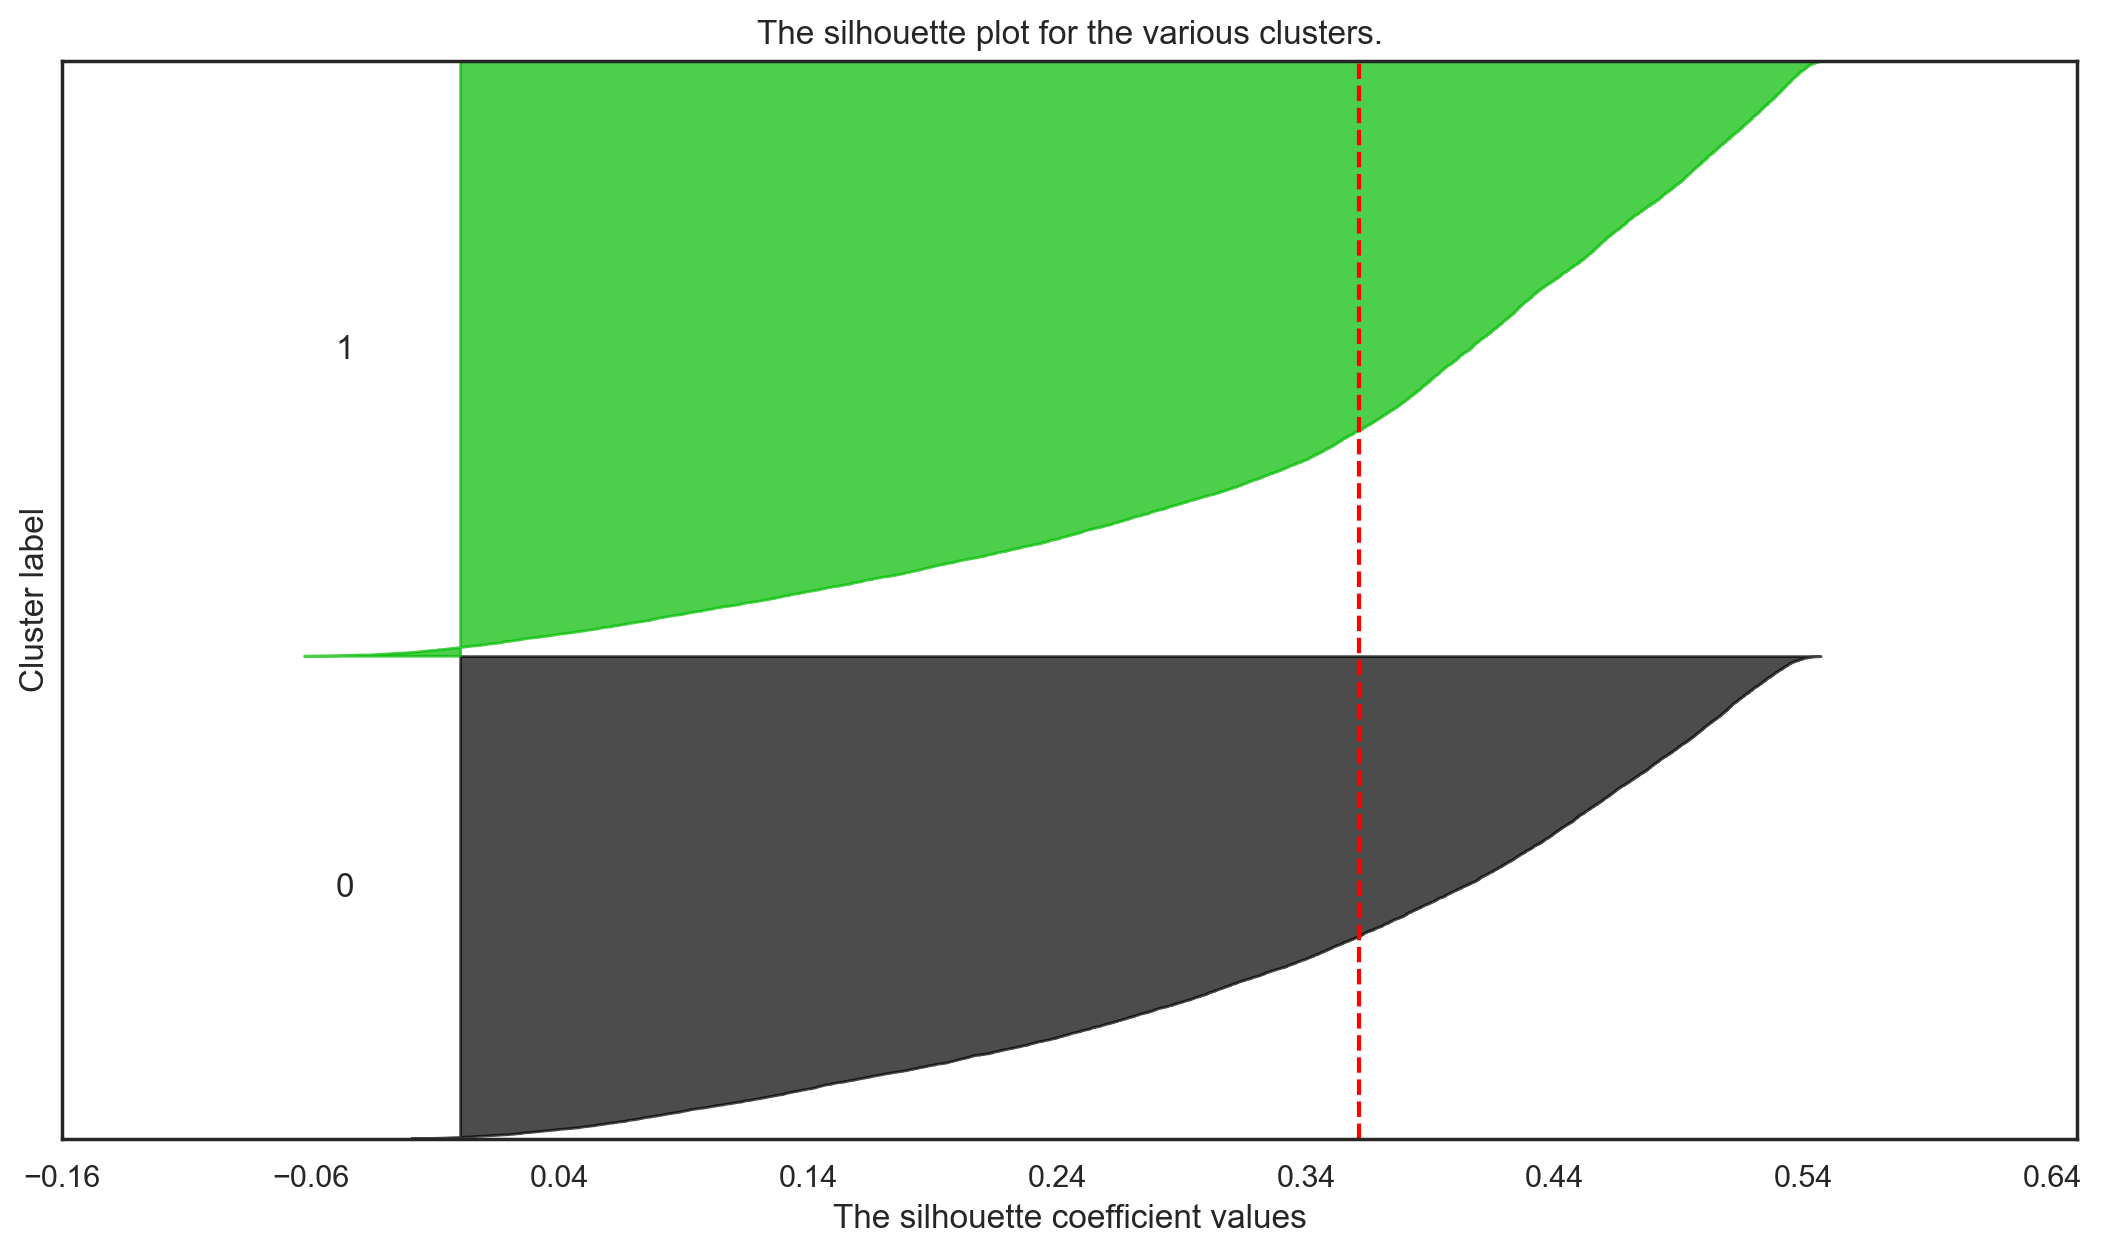

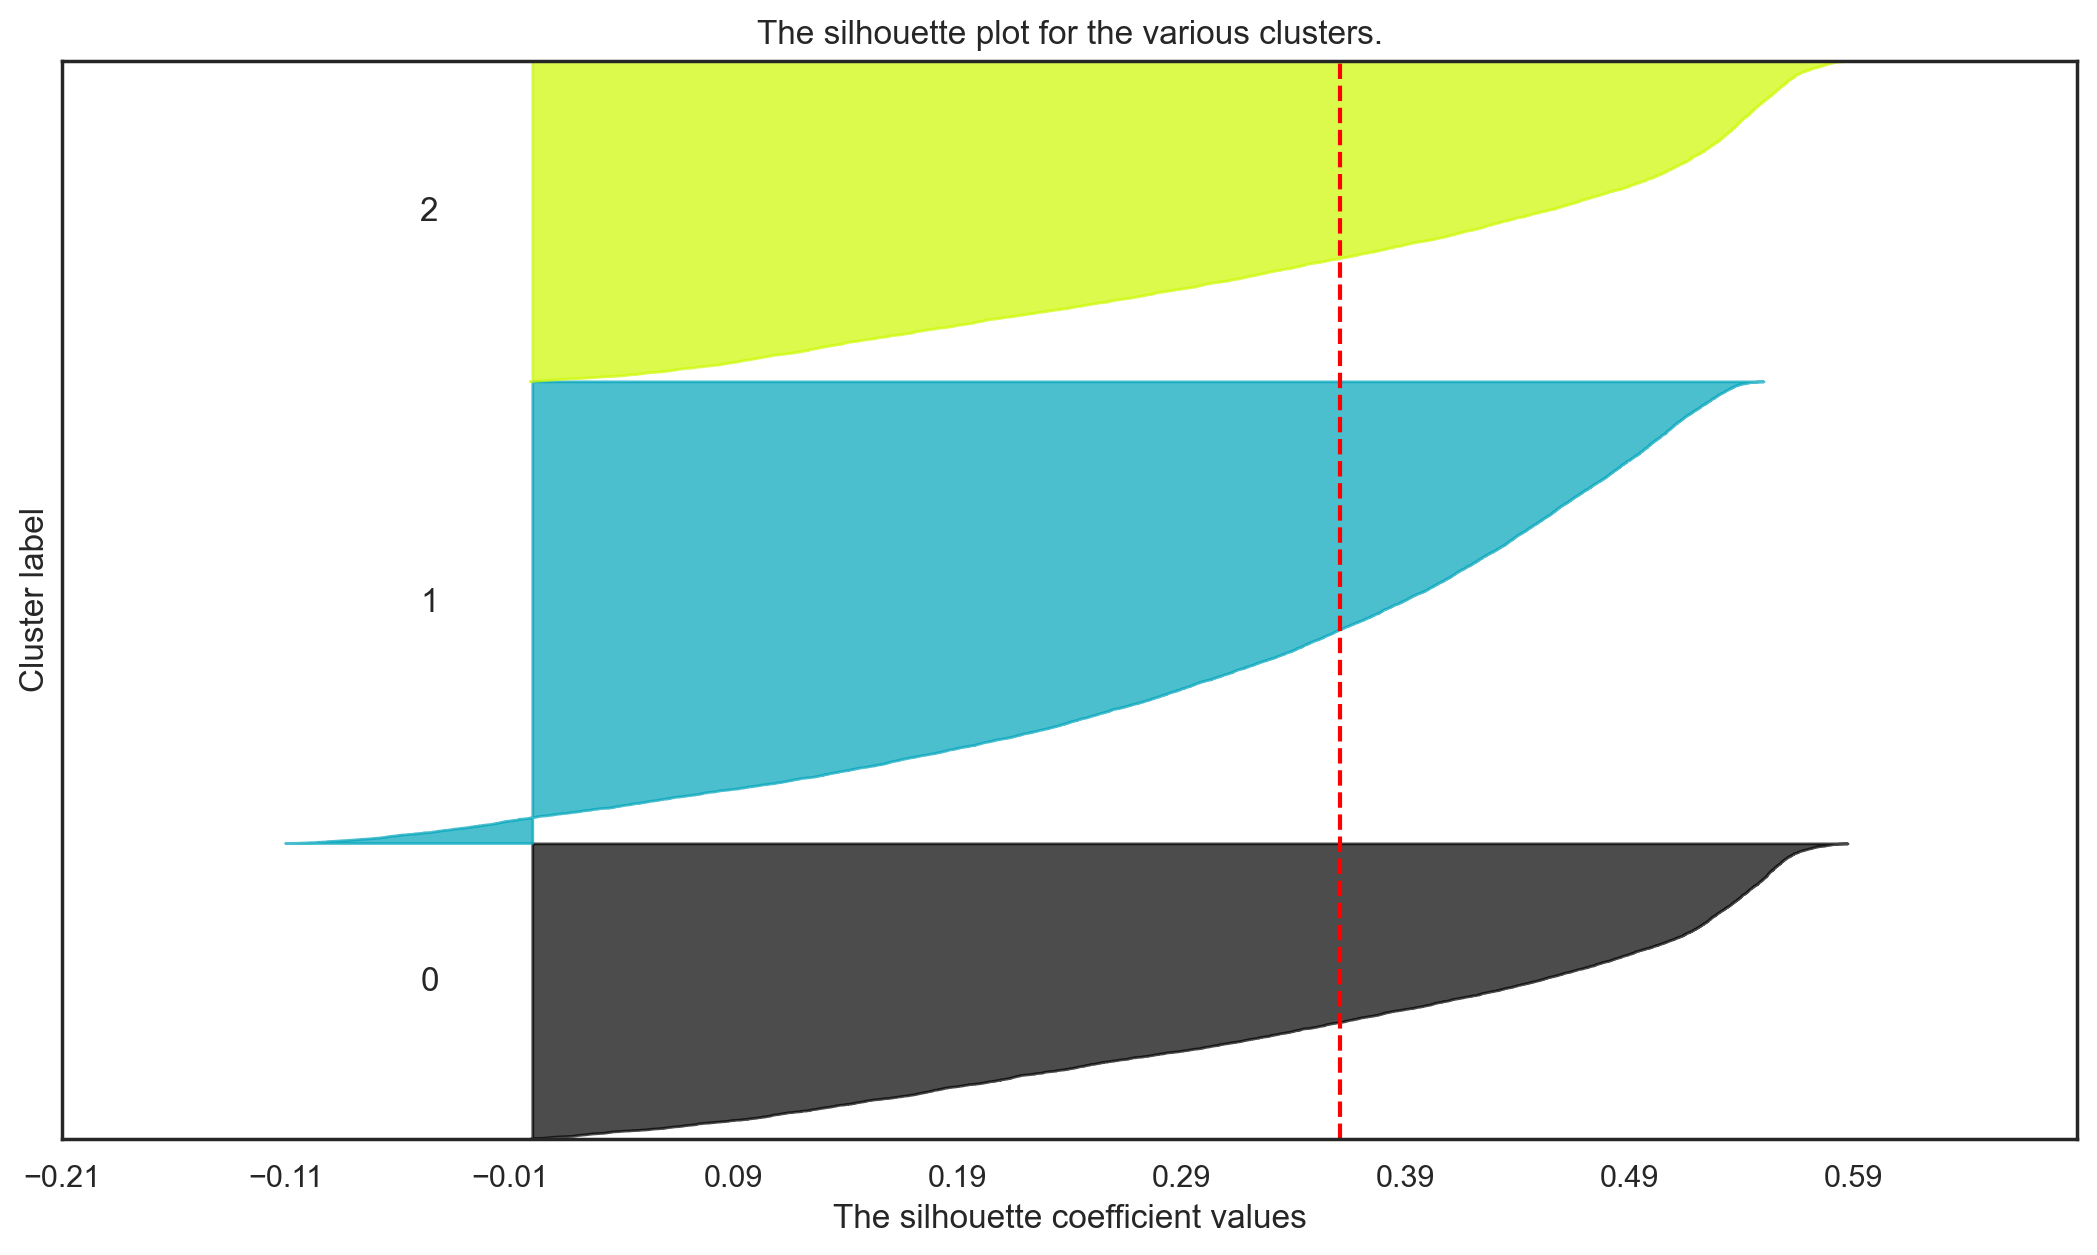

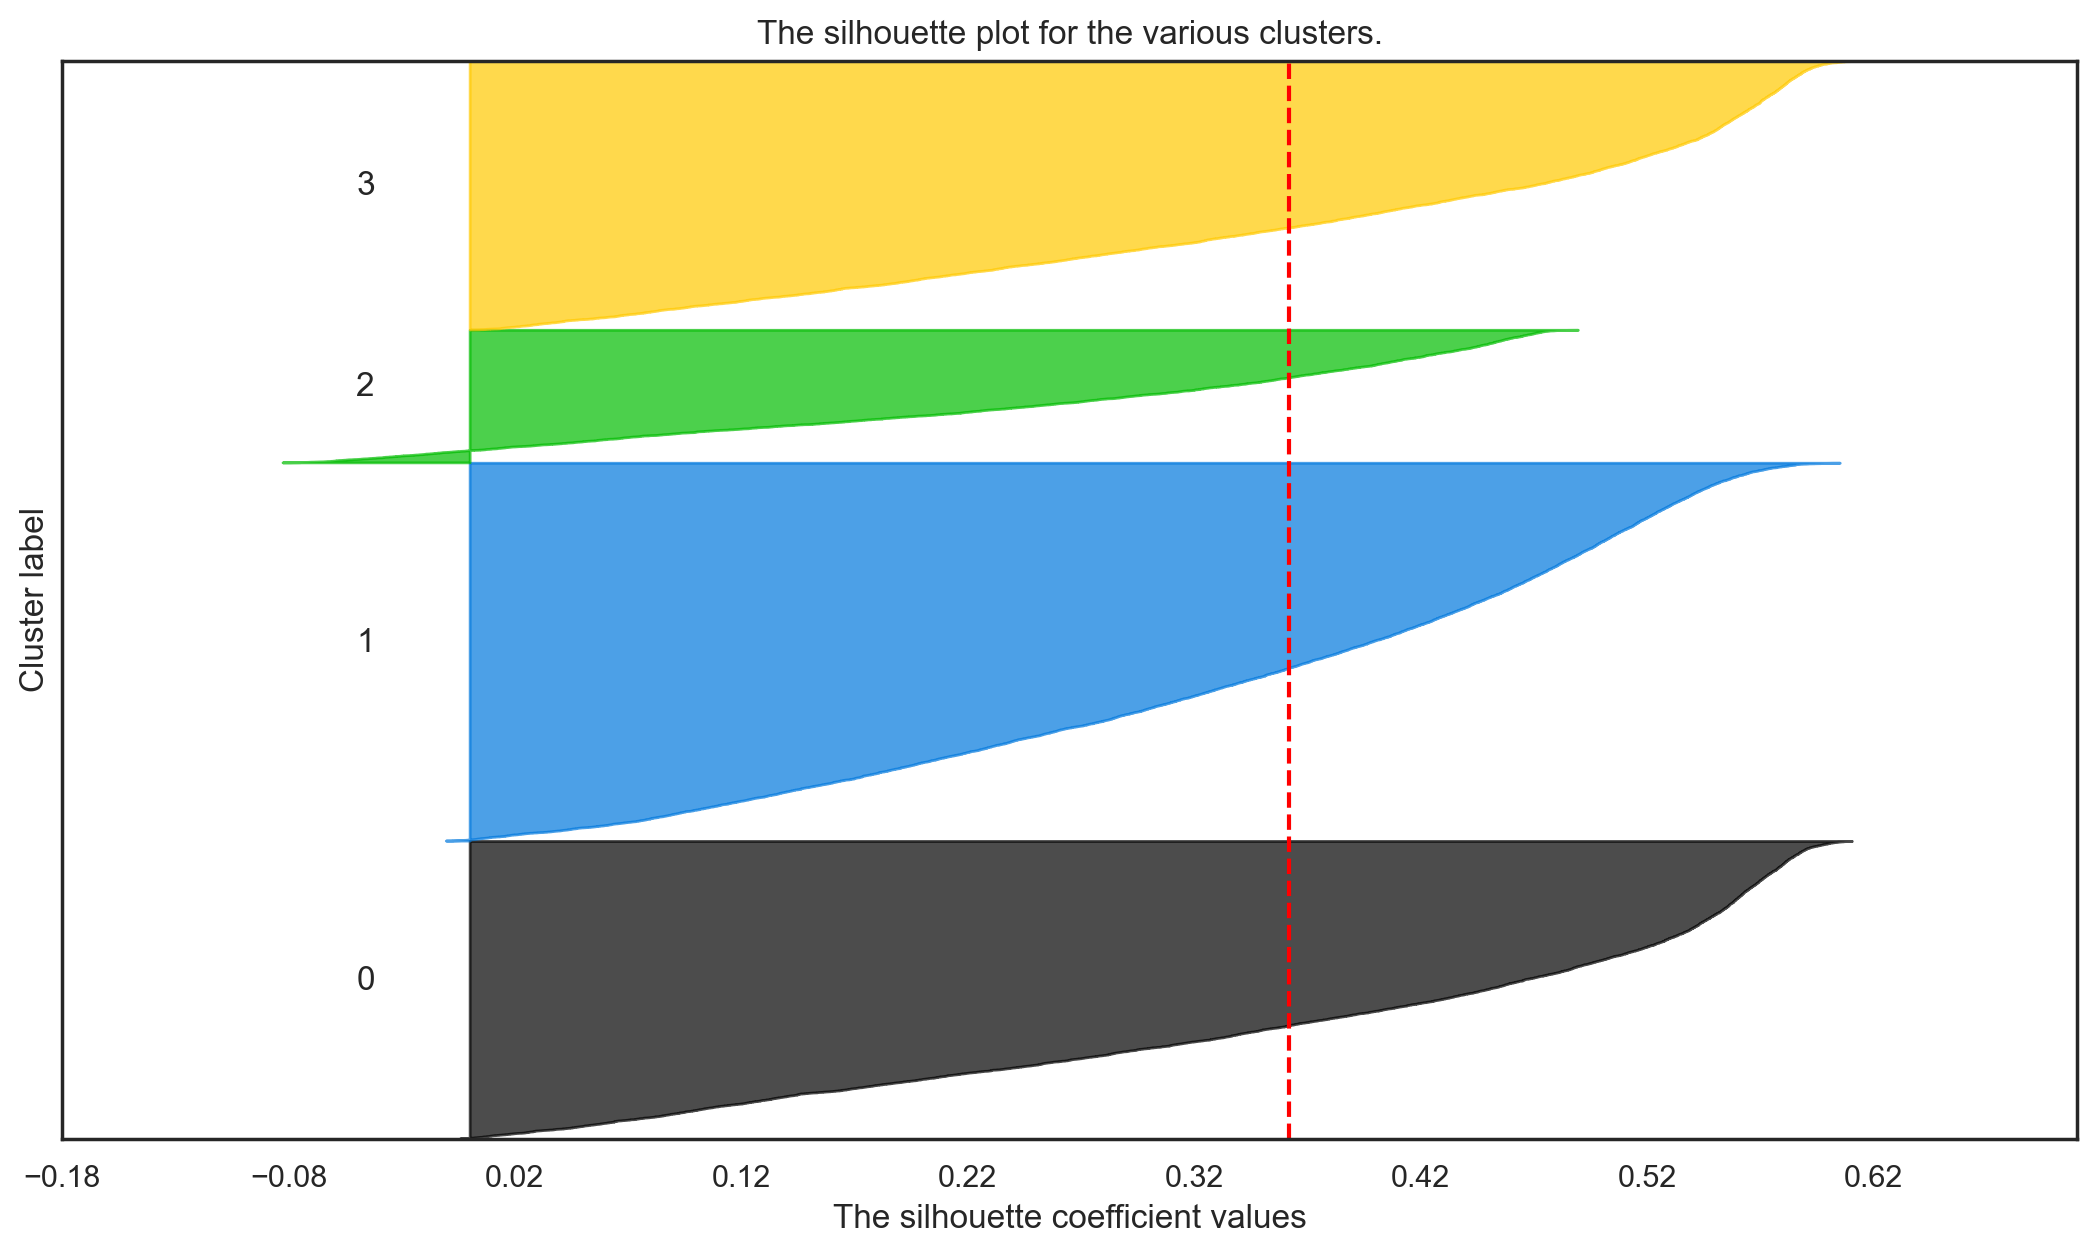

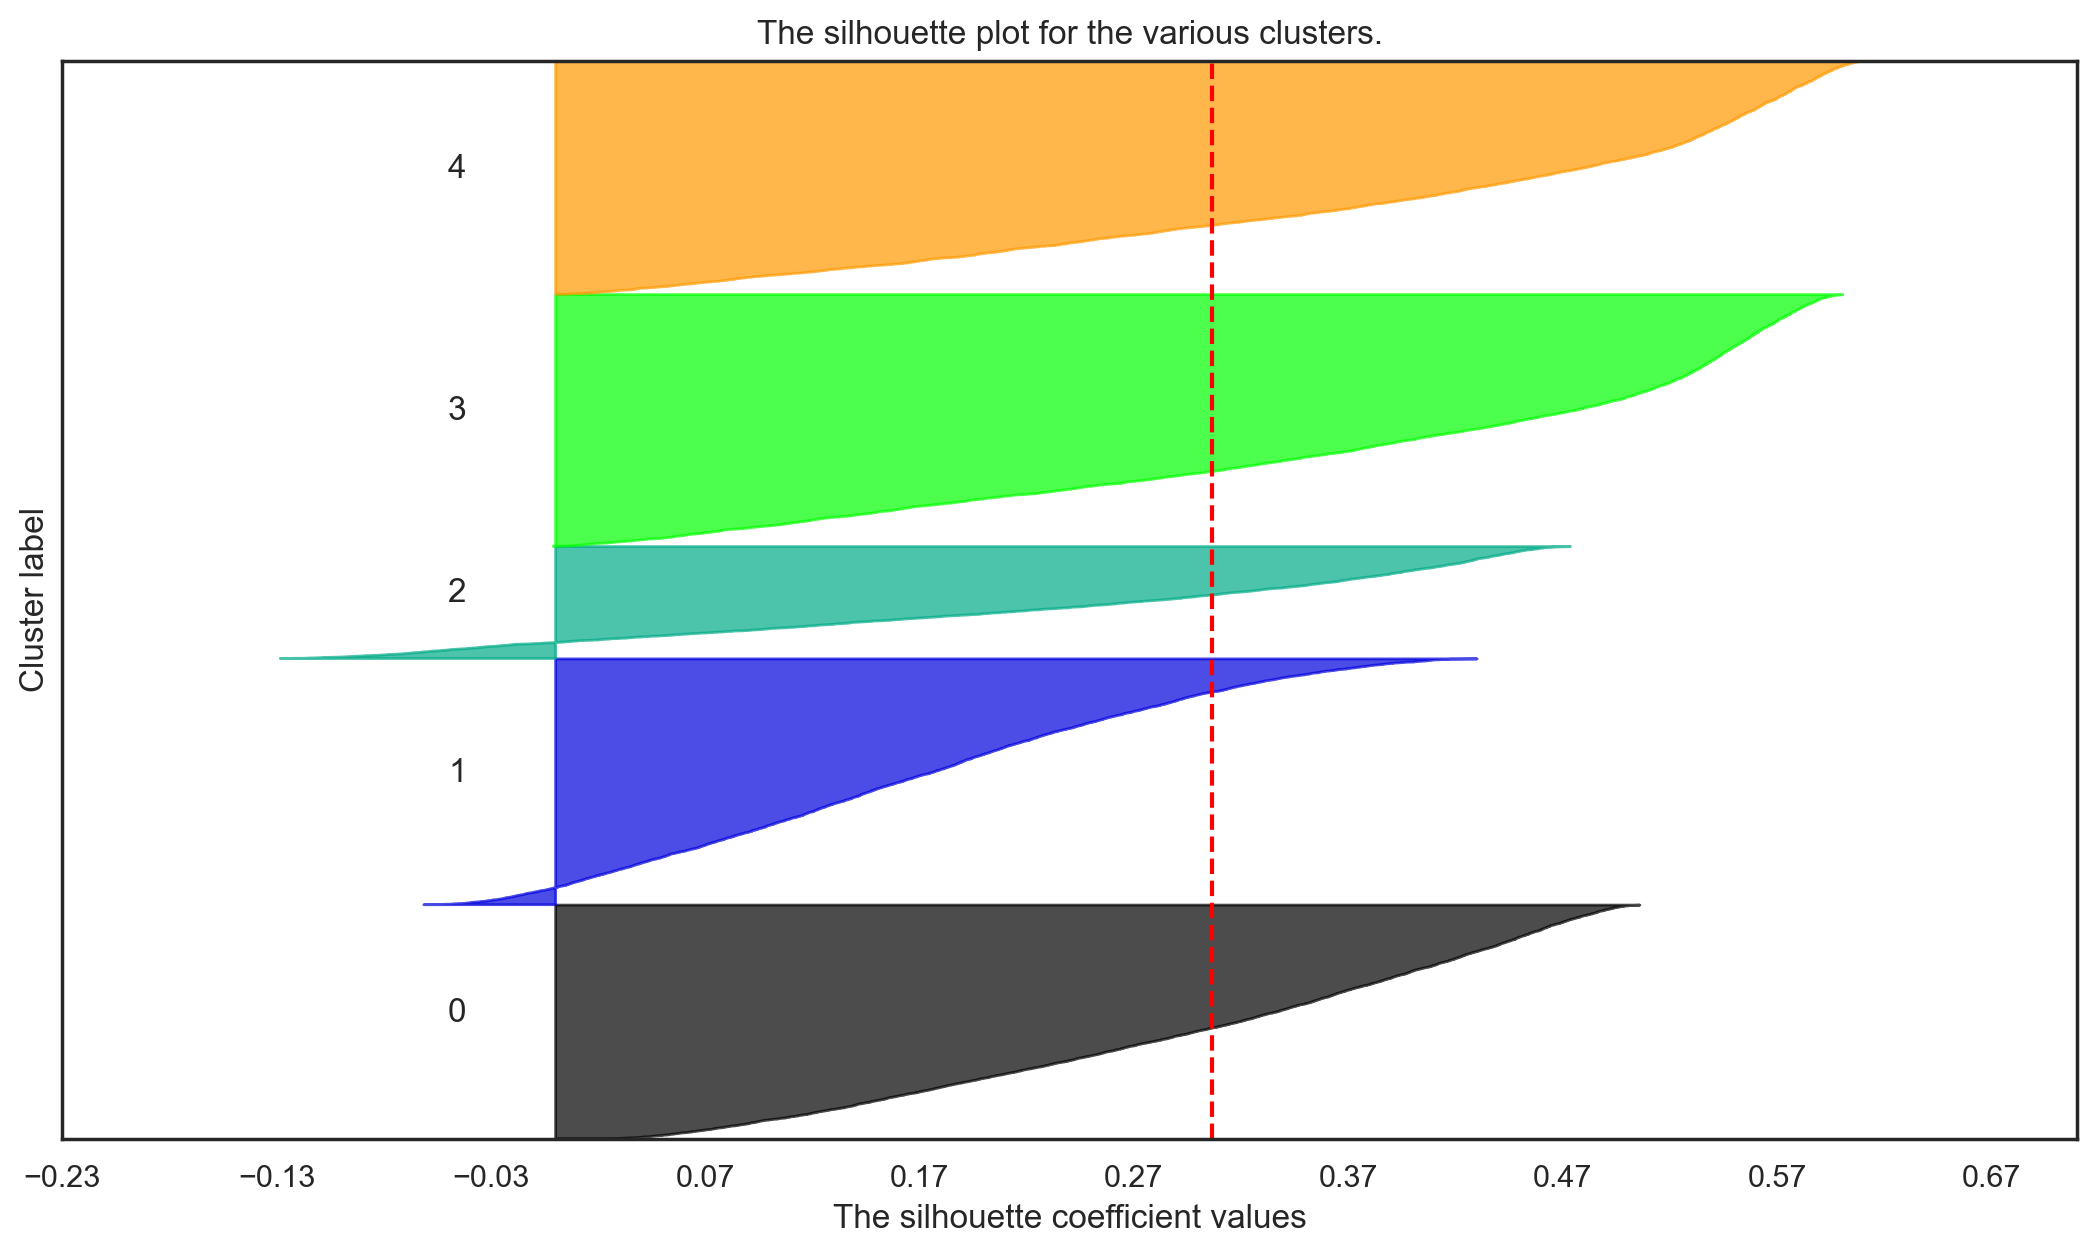

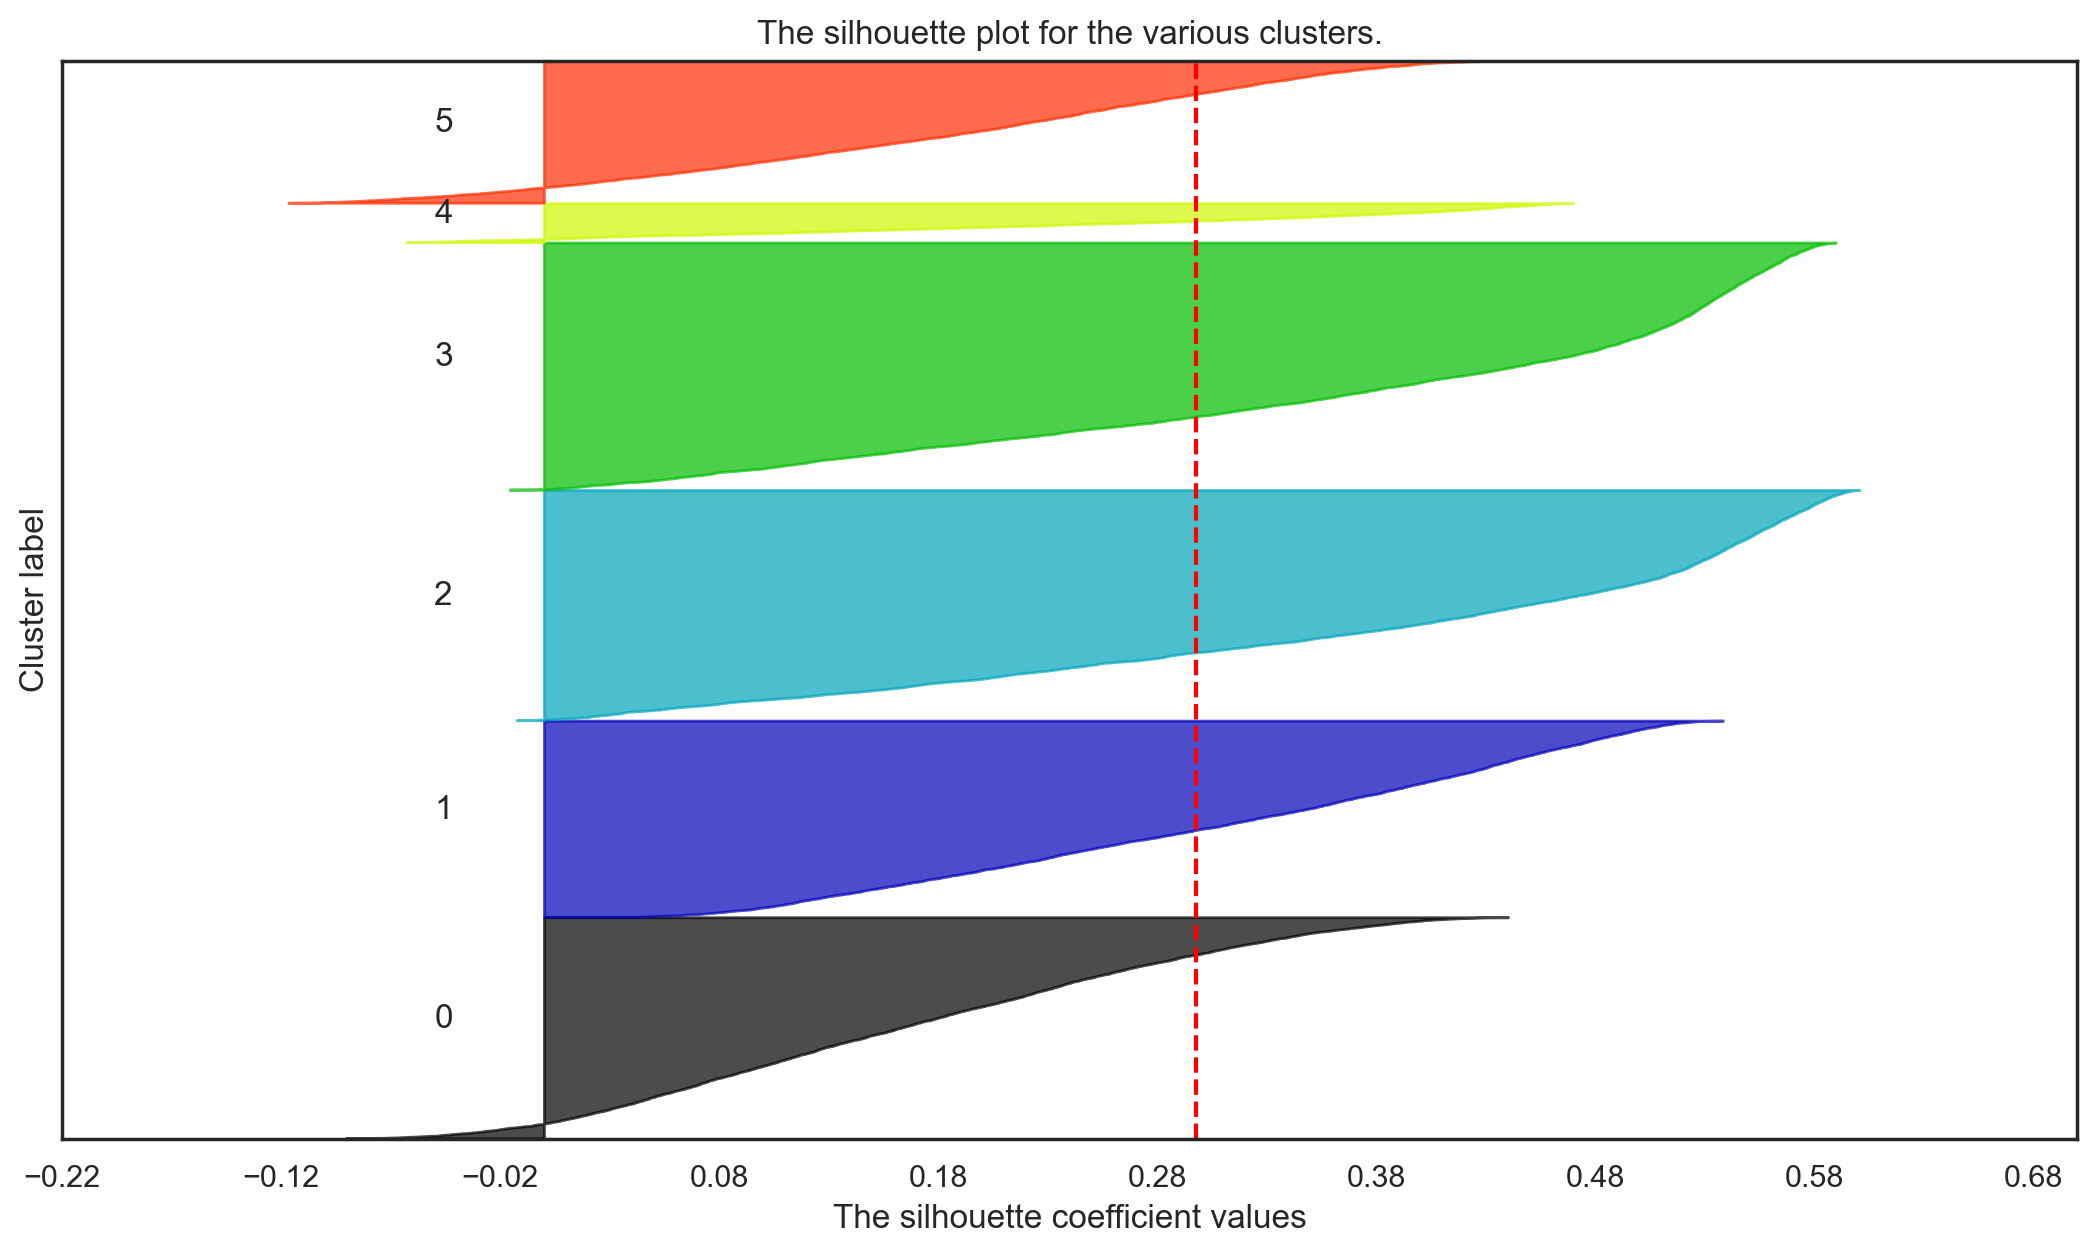

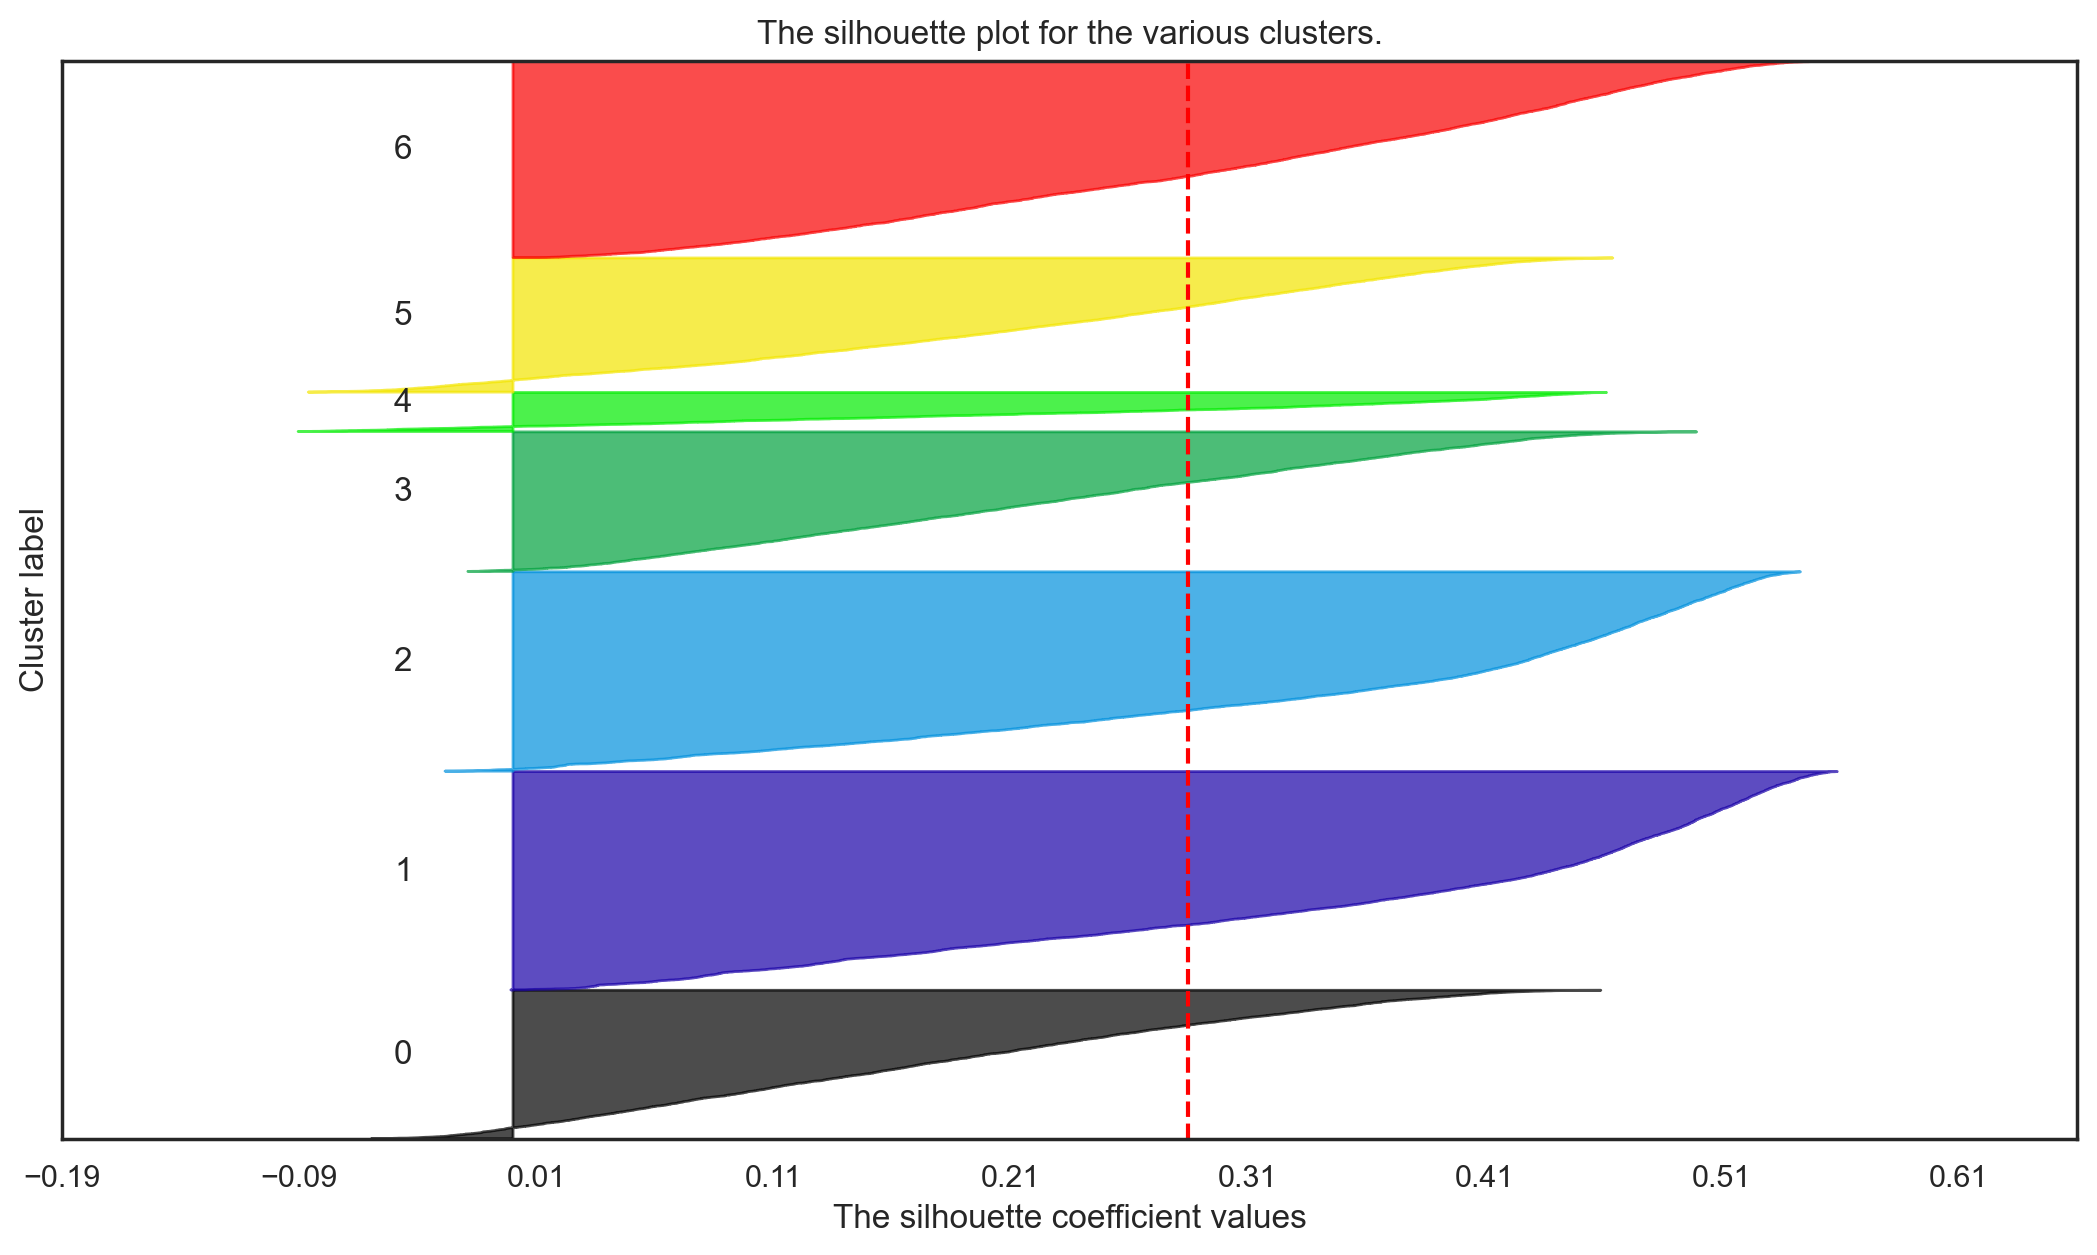

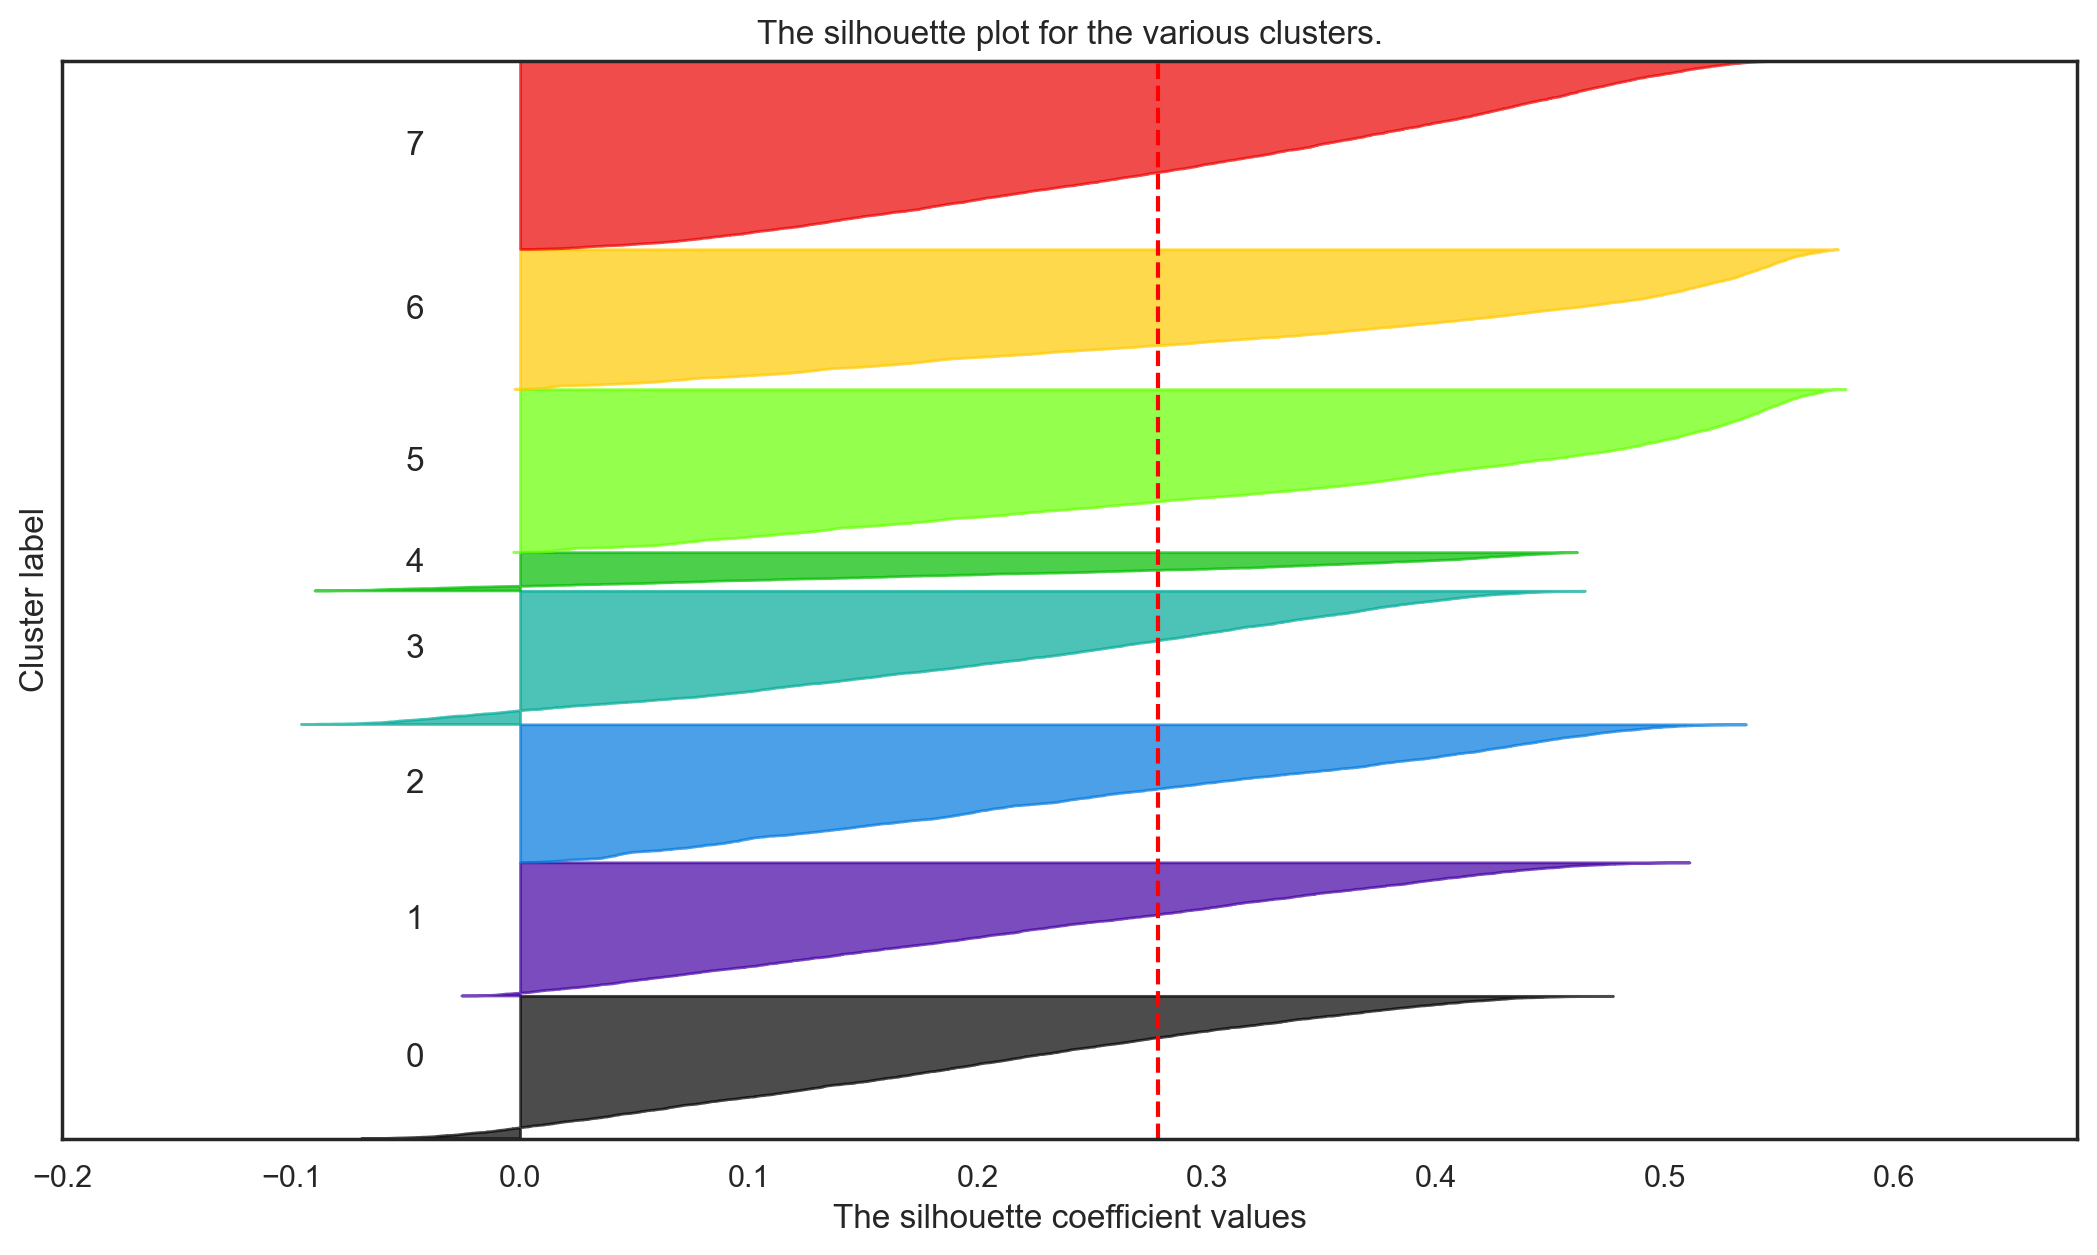

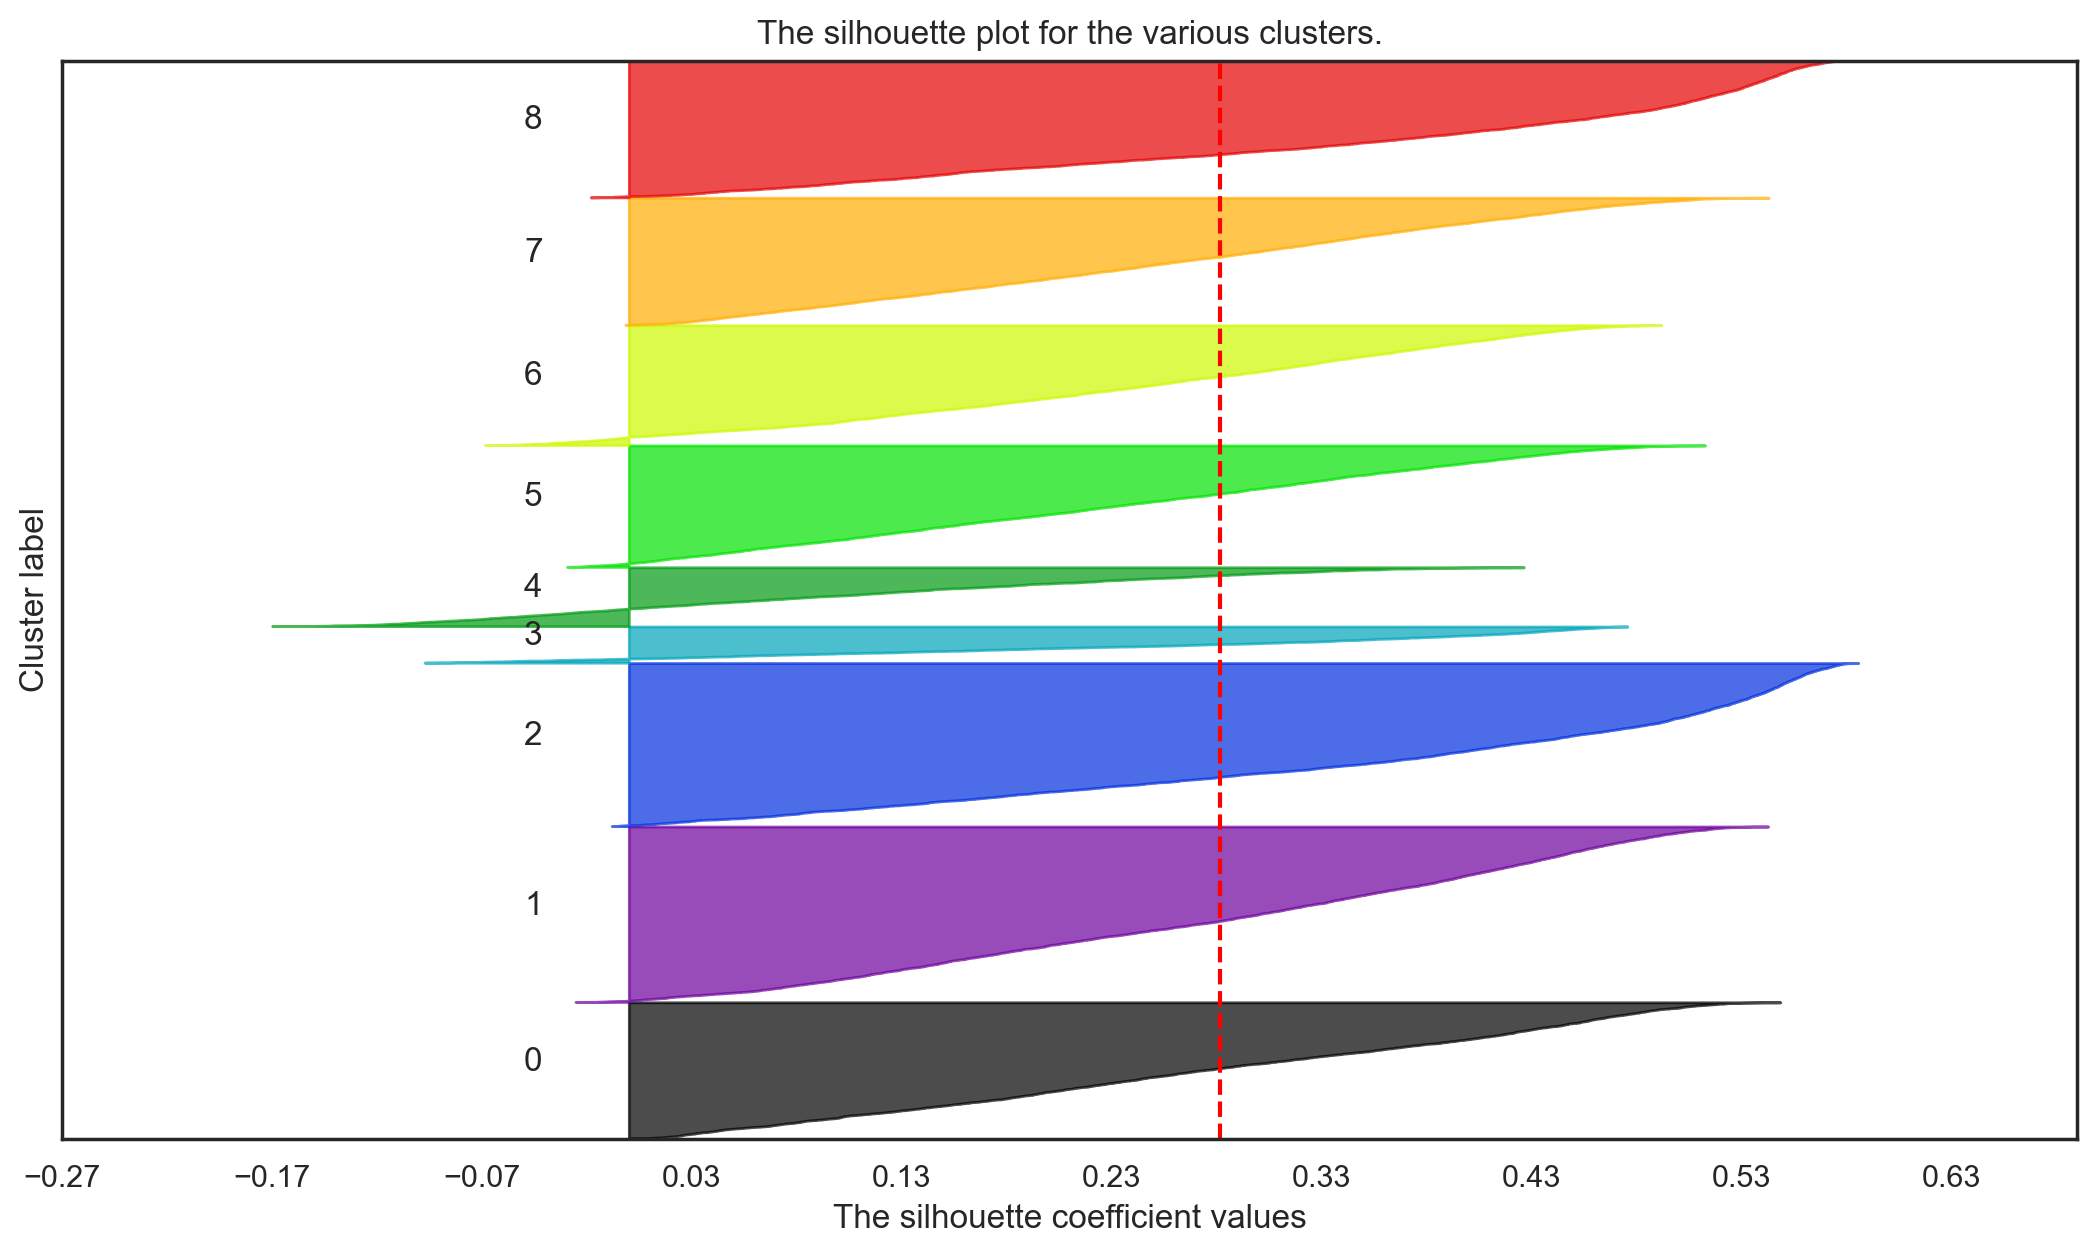

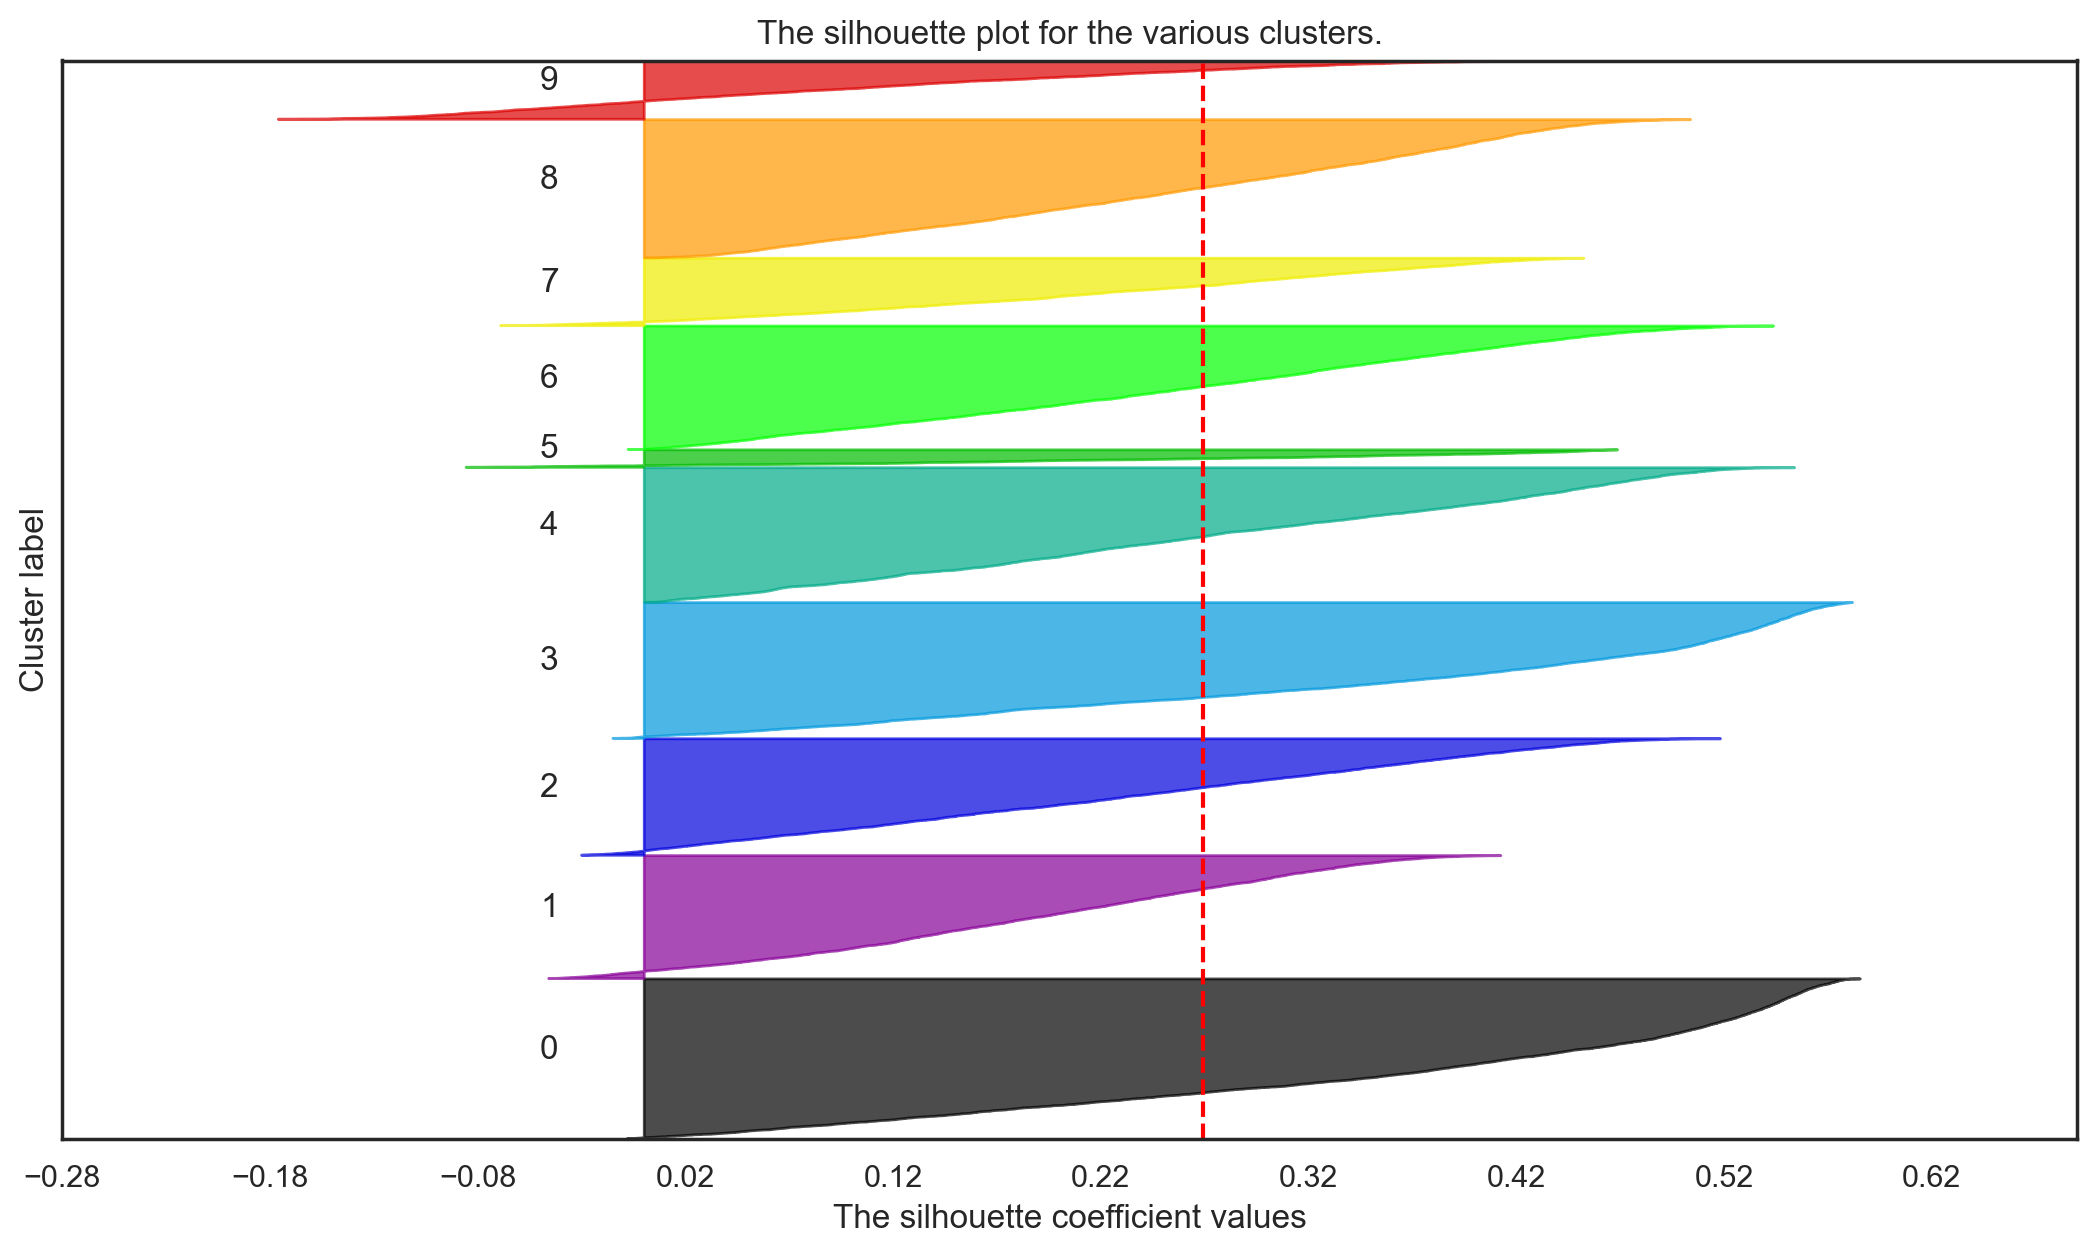

In [25]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
import matplotlib.cm as cm

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(ABCDEats[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(ABCDEats[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ABCDEats[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(ABCDEats[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

<div class="alert alert-block alert-info" style="font-size:20px;">

- Cada **linha** no gráfico representa **um ponto de dados** -> Ordenado conforme o score ao cluster que pertence.
- A linha pontilhada é a média dos valores de silhueta para todos os pontos.

> Isto é o resultado de cada ponto e depois temos as silhouette negativas. Boa sol. se tivermos muito no positivo

</div>

---

## **📏 Clustering Evaluation/Analysis**

### **Final KMeans clustering Solution**

<div class="alert alert-block alert-danger" style="font-size:30px;">

> **Não sei ver a melhor solução de KMeans pela Silhouette Coefficient. 😩**

In [26]:
# final cluster solution
number_clusters = 5
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(ABCDEats[metric_features])
km_labels

array([4, 4, 4, ..., 4, 4, 4])

In [27]:
# Characterizing the final clusters
df_concat = pd.concat((ABCDEats[metric_features], pd.Series(km_labels, name='labels', index=ABCDEats.index)), axis=1)
df_concat.groupby('labels').mean()

,customer_age,vendor_count,product_count,chain_count,first_order,last_order,order_count,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,CUI_Italian_OTHER_PC,CUI_Chicken_Noodle_PC,CUI_Mixed_PC,CUI_American_Healthy_PC,CUI_Indian_PC,CUI_Japanese_PC,CUI_Beverages_PC,CUI_Desserts_PC,CUI_Thai_PC,CUI_Chinese_PC,CUI_Cafe_PC,CUI_Asian_StreetFood/Snacks_PC,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_Lunch_Dinner_PC,HR_LateNight_PC,HR_Breakfast_PC,HR_AfternoonSnack_PC
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,27.50,3.93,6.54,3.89,9.89,78.89,5.42,69.00,16.47,0.40,33.06,2.95,7.14,0.25,0.12,0.00,-0.06,0.03,-0.04,0.06,-0.01,-0.05,-0.05,0.04,-0.02,0.69,0.67,0.73,0.77,0.84,0.82,0.90,0.62,0.12,0.05,0.02
1,27.41,2.78,4.28,2.35,27.35,66.42,3.51,39.07,12.96,0.41,26.83,2.25,8.38,-0.02,-0.00,-0.16,0.03,-0.04,0.01,0.02,0.02,-0.00,-0.03,0.04,0.02,0.44,0.44,0.46,0.49,0.56,0.56,0.58,-0.12,-0.03,-0.09,-0.04
2,27.48,6.83,14.33,6.78,12.36,79.63,10.64,67.27,8.18,0.33,94.54,4.13,11.62,0.47,-0.18,1.98,-0.51,0.37,-0.10,-0.08,-0.41,-0.01,0.27,-0.15,-0.18,1.39,1.48,1.51,1.56,1.59,1.49,1.63,1.75,0.97,1.48,0.44
3,27.47,1.61,2.32,1.09,65.22,71.53,1.82,6.31,2.51,0.59,19.45,1.43,12.02,-0.24,-0.05,-0.34,0.13,-0.07,0.06,-0.03,0.09,0.04,-0.02,-0.01,0.04,0.21,0.21,0.23,0.26,0.32,0.29,0.30,-0.67,-0.27,-0.27,-0.06
4,27.33,1.59,2.27,1.19,19.18,26.07,1.79,6.88,2.74,0.59,17.49,1.44,11.26,-0.20,0.02,-0.41,0.13,-0.08,0.02,-0.01,0.08,0.02,-0.03,0.01,0.03,0.21,0.23,0.23,0.22,0.27,0.30,0.32,-0.62,-0.26,-0.38,-0.12


<div class="alert alert-block alert-warning" style="font-size:20px;">

### **How can we combine the 2 algorithms? (`KMeans` and `Hierarchical`)**


- **AgglomerativeClustering** is a hierarchical clustering algorithm that builds a tree of clusters.
- **KMeans** is a partitioning algorithm that clusters data points into K clusters.

**How can we combine the two?**

1. Use **HC** dendogram to find $k$ (number of clusters). Then use KM with this $k$. **[Mas o prof. não gosta muito]**
2. Use **KM** with a large $k$. Use **HC** to find $k$ menor!

> We can use the **Hierarchical Clustering** to determine the number of clusters and then use **KMeans** to cluster the data points into those clusters.

</div>


In [28]:
# Absolute and Relative Frequency of the clusters [K-Means - Final Solution]
cluster_counts = df_concat['labels'].value_counts().sort_index()
cluster_freq = df_concat['labels'].value_counts(normalize=True).sort_index()

# Create a DataFrame with the absolute and relative frequency of the clusters
cluster_freq_df = pd.concat([cluster_counts, cluster_freq], axis=1)
cluster_freq_df.columns = ['n', '%']
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

,n,%
Cluster,,
0,6550,0.22
1,6894,0.23
2,3139,0.10
3,7056,0.23
4,6530,0.22


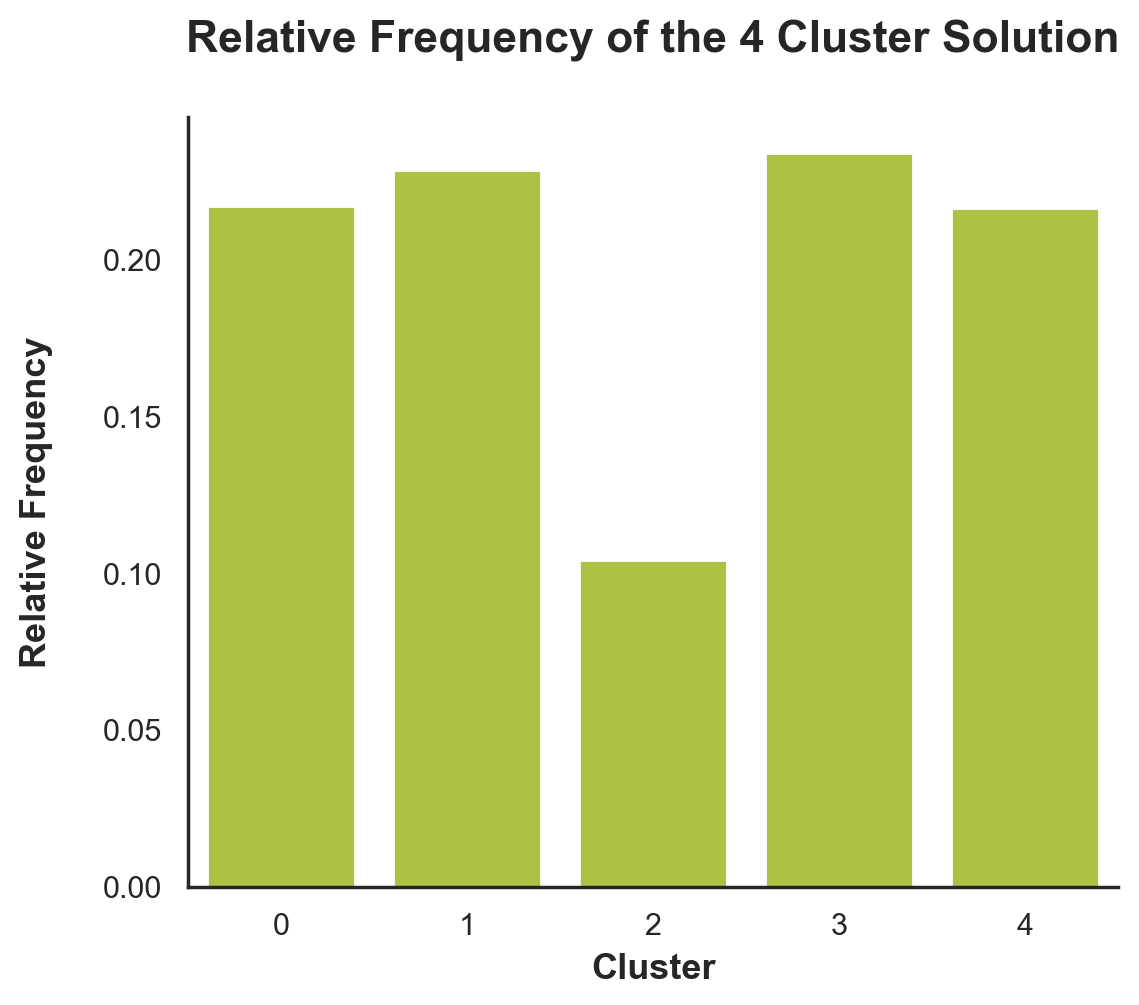

In [29]:
# Barplot of the Relative Frequency [K-Means - Final Solution]
fig = plt.figure(figsize=(6,5))

sns.barplot(x=cluster_freq_df.index, y=cluster_freq_df['%'], color=NOVAIMS_palette_colors[0])
plt.xlabel('Cluster', fontsize=13, fontweight='bold')
plt.ylabel('Relative Frequency\n', fontsize=13, fontweight='bold')
plt.title('Relative Frequency of the 4 Cluster Solution\n', fontsize=16, fontweight='bold')
sns.despine(right=True, top=True)
plt.show()

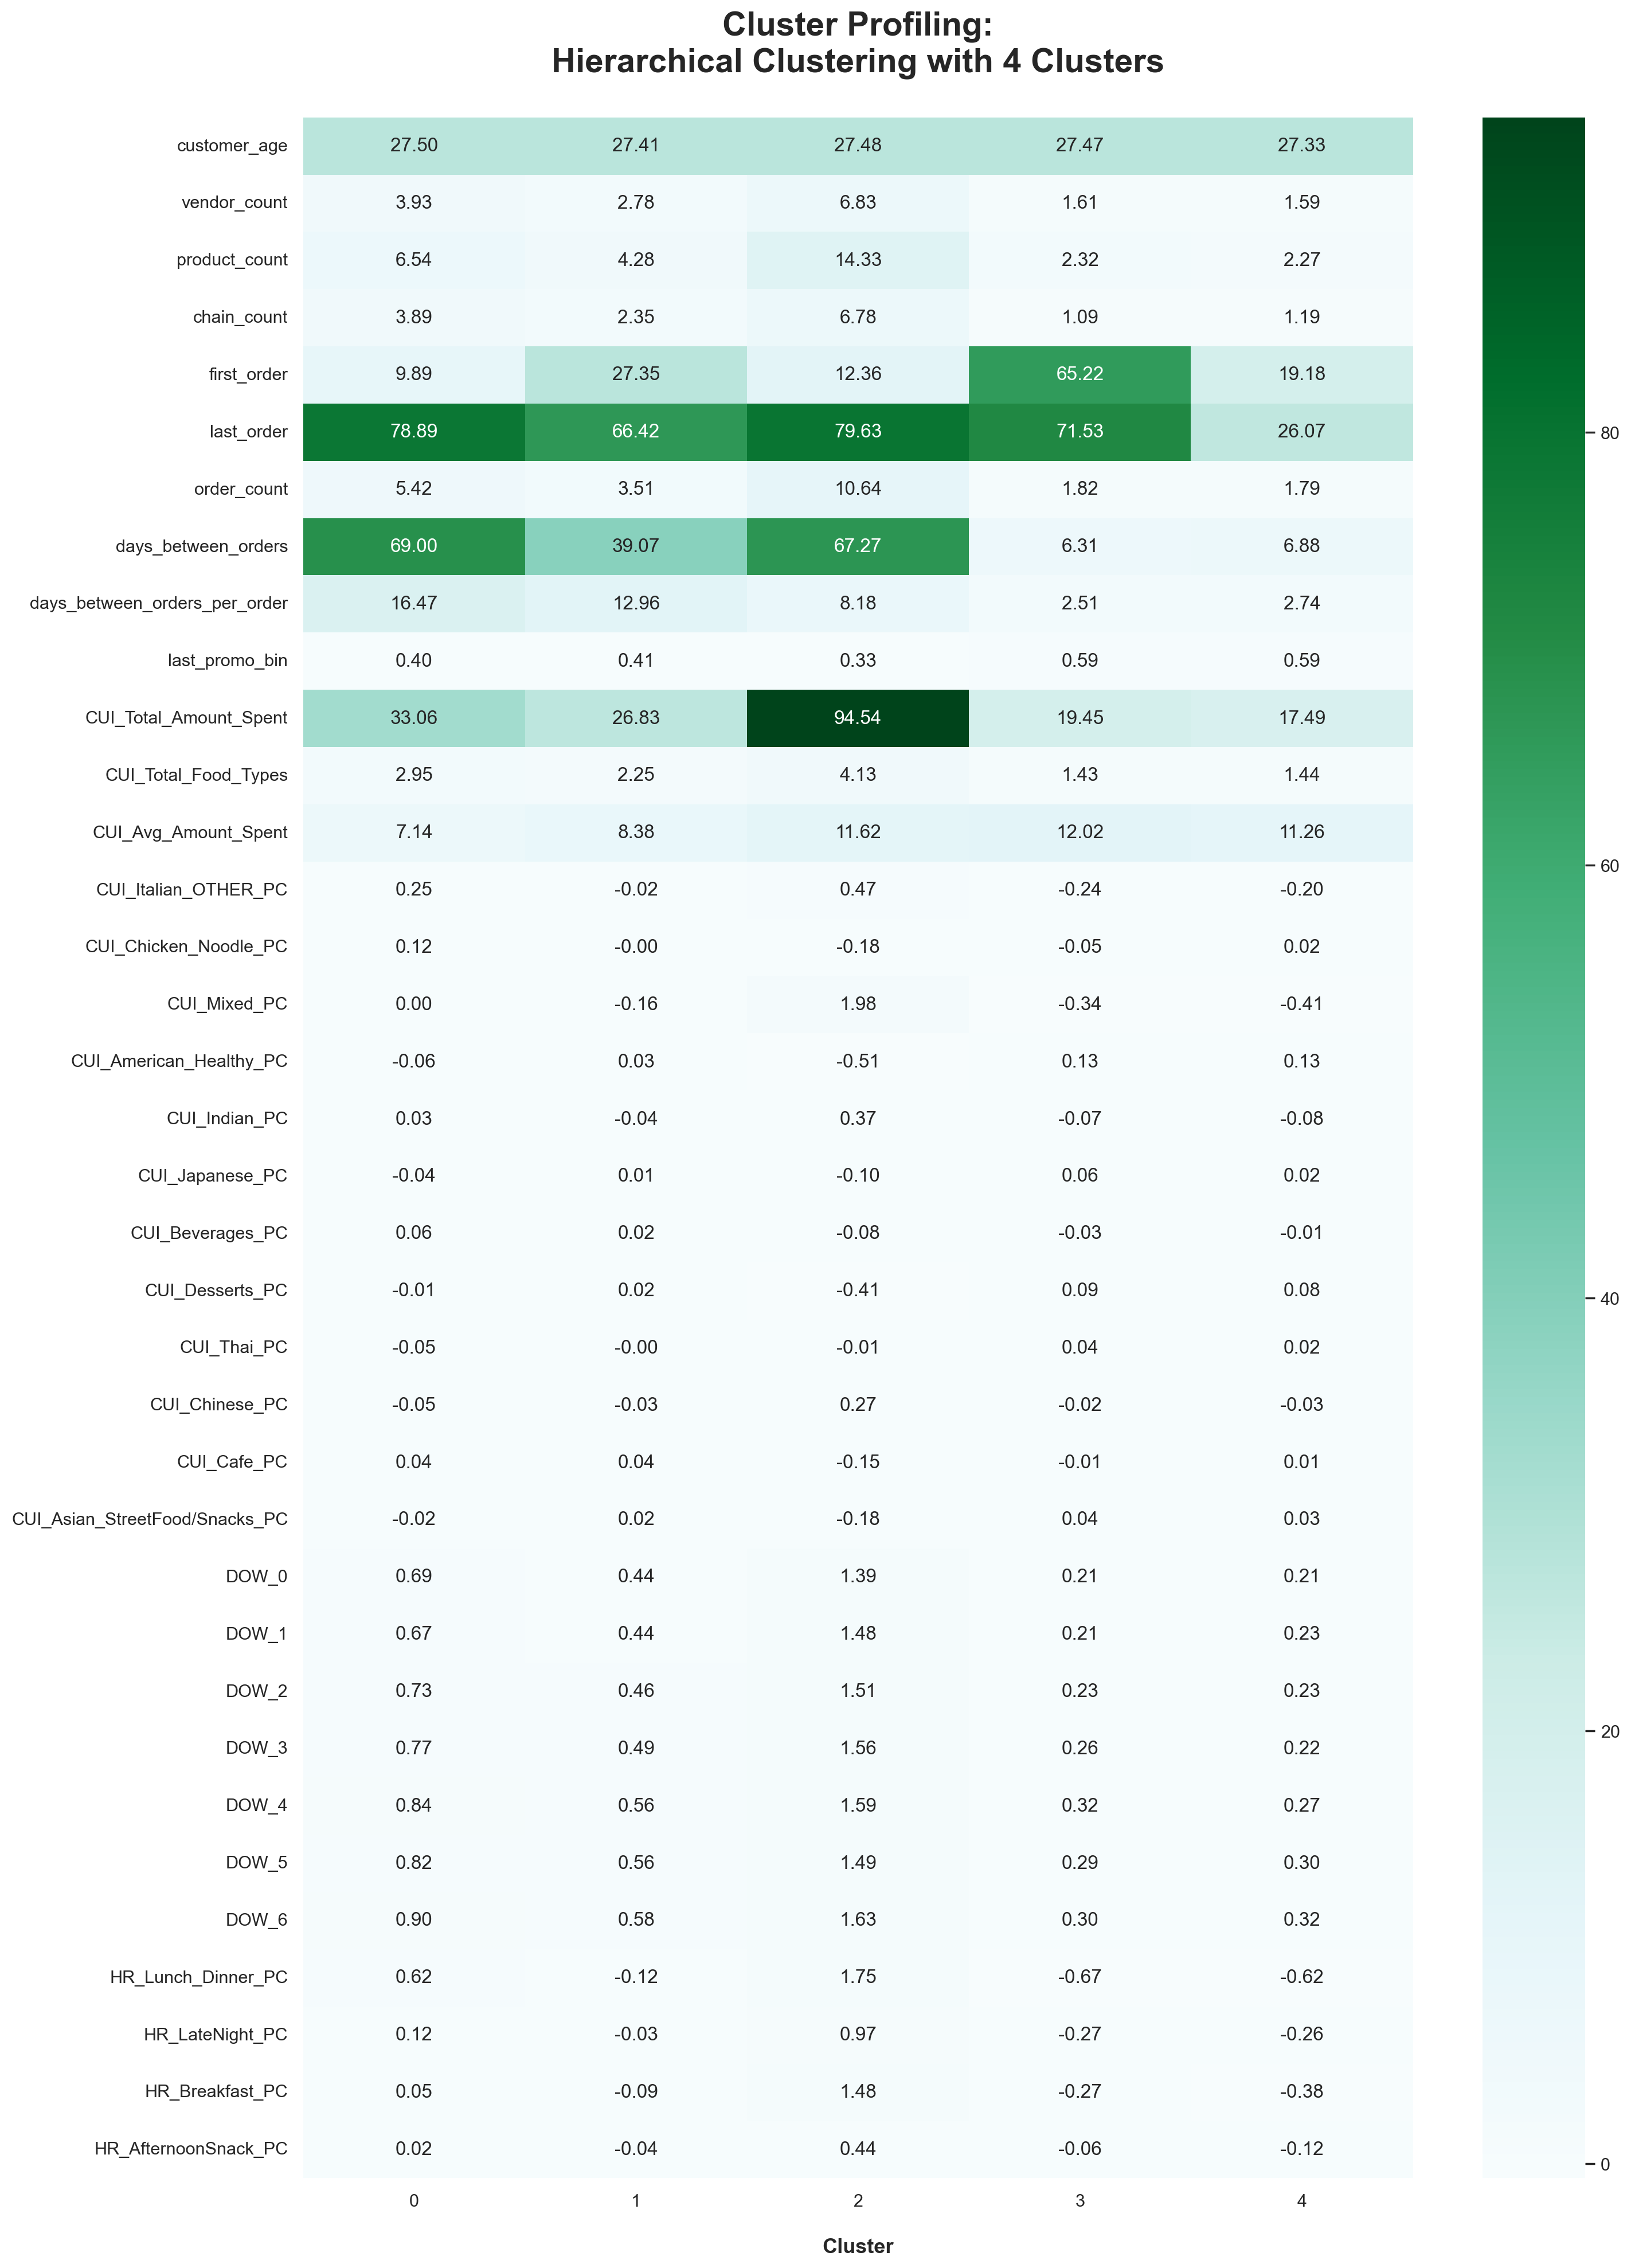

In [31]:
#### Visualize the cluster means as a heatmap to the population means. 
# Explain these values for the population means.
fig, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(df_concat.groupby('labels').mean().T, cmap="BuGn", annot=True, fmt=".2f", ax=ax)

# Finalize the plot
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('\nCluster', fontsize=13, fontweight='bold')
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 4 Clusters\n", fontsize=21, fontweight='bold')

plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_Cluster_Profiling.png', dpi=300, bbox_inches='tight')
plt.show()

---

## **💾 Save ***KMeans*** Clustering Solution**

In [ ]:
# Save the cluster labels of the 4 Cluster Solution [K-Means] to a parquet file [index + labels]
df_concat[['labels']].to_parquet('data/DM2425_ABCDEats_KMeans_Cluster_Labels.parquet', index=True)

---